# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/position-salaries-polynomial-linear-regression/position_salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print("X :",X)

X : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print("y :",y)    #reshape to 2D-Array

y : [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(-1,1)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print("Values of Metrics of Features X :\n",X)

Values of Metrics of Features X :
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print("Values of Dependant Variable y :\n",y)

Values of Dependant Variable y :
 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [9]:
#y = np.ravel(y)

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [12]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[7]])).reshape(-1,1))

array([[209410.23132923]])

## Visualising the SVR results

In [13]:
y_t = svr.predict(X)

In [14]:
sc_y.inverse_transform(y_t.reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

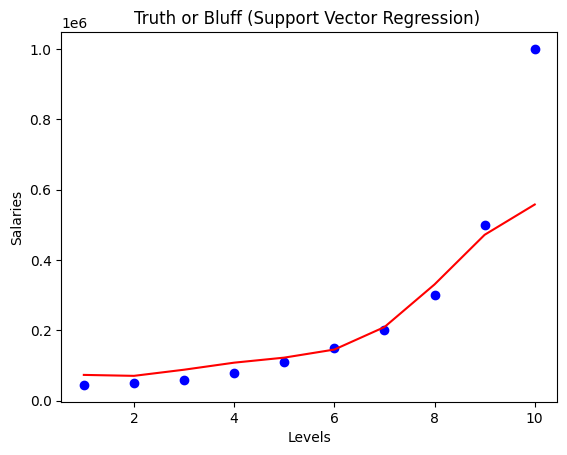

In [15]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X).reshape(-1,1)), color='red')
plt.xlabel("Levels")
plt.ylabel("Salaries")
plt.title("Truth or Bluff (Support Vector Regression) ")
plt.show()

In [16]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

## Visualising the SVR results (for higher resolution and smoother curve)

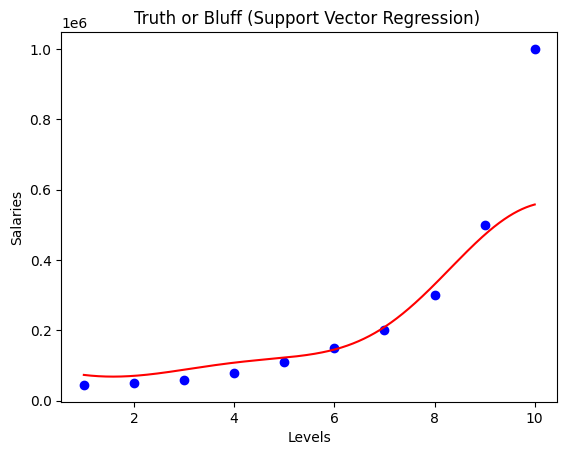

In [17]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.00001)
X_grid = X_grid.reshape(-1,1)

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color ='blue')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='red')
plt.xlabel("Levels")
plt.ylabel("Salaries")
plt.title("Truth or Bluff (Support Vector Regression) ")
plt.show()